#  Small Circle inside Large Circle

#### Fernanda Weiss
#### Fabián Fernandez

Lo siguiente es un problema de clasificación, en donde los datos a clasificar son modelos no-lineales y linealemente inseparables. Es inseparable ya que al tener datos de entrada $x \in R^2$ y su etiqueta correspondiente $y \in \{−1, 1\}$, no existe un vector de pesos $w \in R^2$ y $b \in R$ tal que $y(w^Tx + b) \geq \rho > 0$

### a) Crear dataset de entrenamiento y prueba

(a) Escriba una funci´on que genere (aleatoriamente) n datos etiquetados de la forma {(x1, y1), . . . ,(xn, yn)}, xi ∈ R^2, yi ∈ {0, 1}, con una distribuci´on de probabilidad que refleje la configuraci´on linealmente inseparable que muestra la Fig. 13 . Utilice esta funci´on para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5 % de ruido al dataset, generando x’s cercanos a la frontera. Genere un gr´afico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

Se crean dos conjuntos de datos, uno de entrenamiento y otro de prueba, cada uno contiene 1.000 datos de la forma  $\{(x_1, y_1), . . . ,(x_n, y_n)\}$, $x_i ∈ R^2$, $yi \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable.

Además se agrega un 5% de ruido a los datos, generando nuevos $x_i$ cercanos a la frontera.

In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),np.append(outer_circ_y, inner_circ_y))).T
    
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [2]:
X_no_noisy,y_no_noisy,X_no_noisy_test,y_no_noisy_test = do_circles(2000, 0)

In [3]:
import matplotlib.pyplot as plt
def visualize(x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    plt.title(title)
    plt.show()

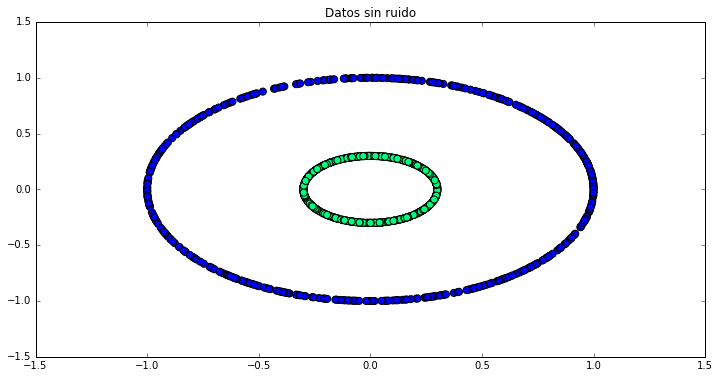

In [4]:
visualize(X_no_noisy, y_no_noisy, "Datos sin ruido")

In [5]:
X_train,y_train,X_test,y_test = do_circles(2000, 0.05)

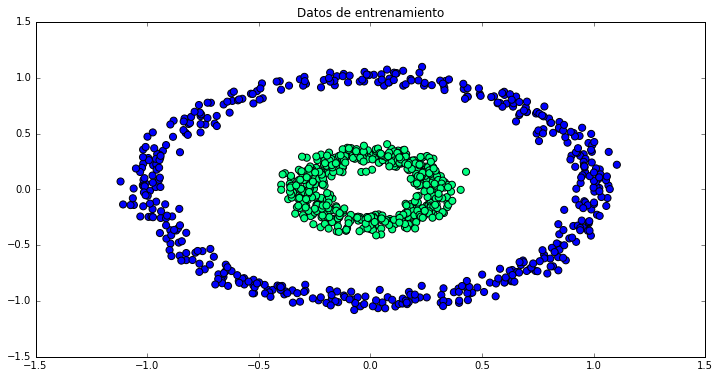

In [6]:
visualize(X_train, y_train, "Datos de entrenamiento")

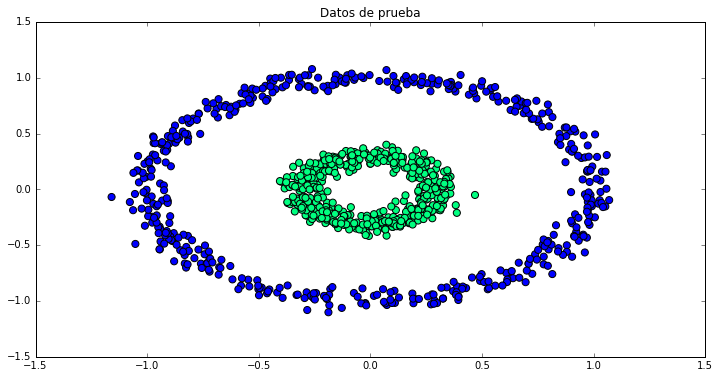

In [7]:
visualize(X_test, y_test, "Datos de prueba")

Mediante la primera gráfica se puede ver como sería un dataset generado sin ruido. Luego se muestra el dataset de entrenamiento y prueba, respectivamente, con el 5% de ruido inducido.

Para lo que sigue, se utilizará la siguiente función para graficar las fronteras de clasificación en base a la probabilidad, definida por un algoritmo, de un ejemplo a pertenecer a una clase en particular.

In [8]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

### b) Red neuronal artificial con una neurona

Se intenta resolver el problema de clasificación con una red neuronal artificial con solo una neurona, es decir, sin capas escondidas. 

(b) Demuestre experimentalmente que una red neuronal artificial correspondiente a 1 sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la funci´on de activaci´on y el m´etodo de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los par´ametros de la m´aquina de aprendizaje, reportando m´etricas que permitan evaluar el desempe˜no del modelo en el problema con cada cambio efectuado. Adapte tambi´en la funci´on plot classifier para que represente gr´aficamente la soluci´on encontrada por la red neuronal. Describa y explique lo que observa, reportando gr´aficos de la soluci´on s´olo para algunos casos representativos.

Parámetros keras: No se usará regularizador

* Layer: Dense
    * units: primer numero que se pone, indica la dimensionalidad del output
    * activation: funcion de activación que se usa, sin esto se usara a(x)=x. https://keras.io/activations/
       Existe:
       * linear
       * sigmoid
       * hard_sigmoid
       * tanh
       * relu
       * softsign
       * softplus
       * selu
       * elu
       * softmax
    * kernel_initializer: Initializer for the kernel weights https://keras.io/initializers/
    
    
* Optimizadores disponibles: Solo usaré SGD porque los otros ni los cacho https://keras.io/optimizers/
    * SGD
    * RMSprop
    * Adagrad
    * Adam
    * Adamax
    * Nadam
    * TFOptimizer
   
* Funciones de perdida: https://keras.io/losses/
    * mean_squared_error
    * mean_absolute_error
    * mean_absolute_percentage_error
    * mean_squared_logarithmic_error
    * squared_hinge
    * hinge
    * categorical_hinge
    * logcosh
    * categorical_crossentropy
    * sparse_categorical_crossentropy
    * binary_crossentropy
    * kullback_leibler_divergence
    * poisson
    * cosine_proximity

El optimizador a utilizar en la siguiente sección será un gradiente descendente estocástico (SGD). En una primera instancia se aborda el problema con una capa de entrada con función de activación ReLU (rectified linear unit) y una inicialización de pesos con distribución uniforme y una capa de salida con una función de activación sigmoid. La función de perdida que se utilizará para el siguiente modelo será la Cross entropy binaria.

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1
model_sgd_1_relu = Sequential()

model_sgd_1_relu.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model_sgd_1_relu.add(Dense(n_h, init='uniform', activation='sigmoid'))

model_sgd_1_relu.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse'])
model_sgd_1_relu.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
scores = model_sgd_1_relu.evaluate(X_test, y_test)
test_acc = scores[1]

/home/fefi/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/50
1000/1000 [==============================] - 0s 269us/step - loss: 0.6949 - acc: 0.4930 - mean_absolute_error: 0.5006 - mean_squared_error: 0.2509
Epoch 2/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.6930 - acc: 0.5230 - mean_absolute_error: 0.4993 - mean_squared_error: 0.2499
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6933 - acc: 0.5170 - mean_absolute_error: 0.4998 - mean_squared_error: 0.2501
Epoch 4/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.6942 - acc: 0.4990 - mean_absolute_error: 0.5001 - mean_squared_error: 0.2505
Epoch 5/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.6938 - acc: 0.4810 - mean_absolute_error: 0.5003 - mean_squared_error: 0.2503
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6944 - acc: 0.4810 - mean_absolute_error: 0.5005 - mean_squared_error: 0.2506
Epoch 7/50
1000/1000 [==============================] - 0

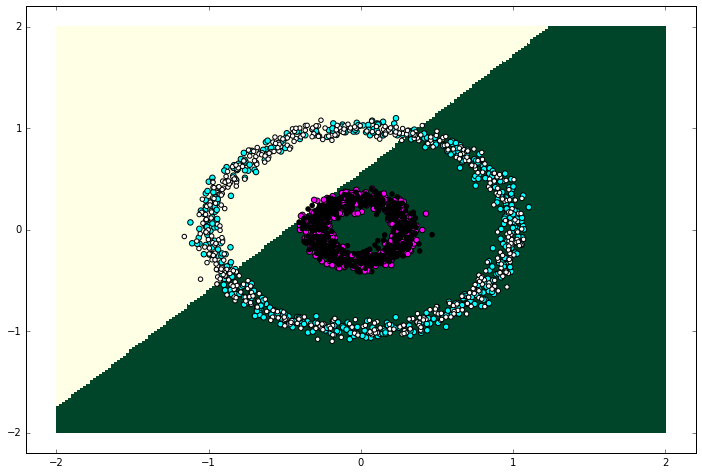

In [40]:
plot_classifier(model_sgd_1_relu,X_train,y_train,X_test,y_test,model_type = 'ann')

# mejorar yo cacho
Como se puede ver con una SGD con tasa de aprendizaje 1, funciona mal, como era de esperar.

In [41]:
n_h=1
model_sgd_01_relu = Sequential()

model_sgd_01_relu.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model_sgd_01_relu.add(Dense(n_h, init='uniform', activation='sigmoid'))

model_sgd_01_relu.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse'])
model_sgd_01_relu.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
scores = model_sgd_01_relu.evaluate(X_test, y_test)
test_acc = scores[1]

/home/fefi/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


Epoch 1/50
1000/1000 [==============================] - 0s 284us/step - loss: 0.6932 - acc: 0.5110 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 2/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.6933 - acc: 0.5070 - mean_absolute_error: 0.5001 - mean_squared_error: 0.2501
Epoch 3/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.4950 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.6932 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 5/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6932 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 6/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2500
Epoch 7/50
1000/1000 [==============================] - 0

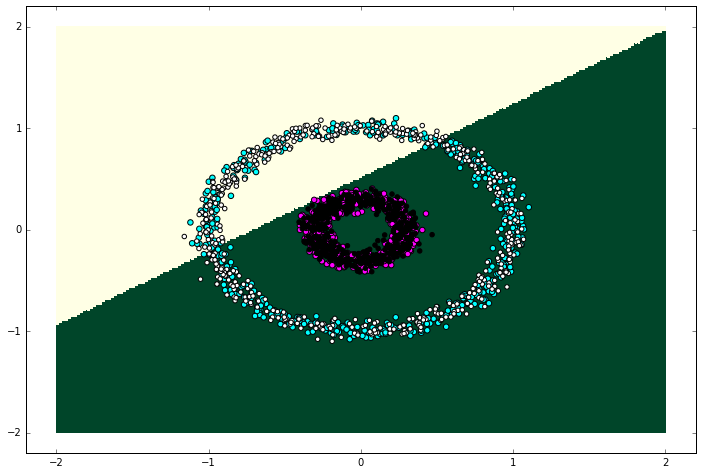

In [12]:
plot_classifier(model_sgd_01_relu,X_train,y_train,X_test,y_test,model_type = 'ann')

Cambiando solo la tasa de aprendizaje del SGD a 0.1, los resultados de la función de pérdida con el accuracy se intercambian y el error cuadrático aumenta un poco. Sin embargo, sigue funcionando mal.

Luego, se prueba cambiando la función de activación de la capa de entrada por una función elu, y volviendo a una tasa de aprendizaje de la SGD de 1.

In [42]:
n_h=1
model_sgd_1_sigmoid = Sequential()

model_sgd_1_sigmoid.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='elu'))
model_sgd_1_sigmoid.add(Dense(n_h, init='uniform', activation='sigmoid'))

model_sgd_1_sigmoid.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse'])
model_sgd_1_sigmoid.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
scores = model_sgd_1_sigmoid.evaluate(X_test, y_test)
test_acc = scores[1]

/home/fefi/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


Epoch 1/50
1000/1000 [==============================] - 0s 298us/step - loss: 0.6944 - acc: 0.5030 - mean_absolute_error: 0.5003 - mean_squared_error: 0.2506
Epoch 2/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.6944 - acc: 0.4990 - mean_absolute_error: 0.5005 - mean_squared_error: 0.2506
Epoch 3/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.6937 - acc: 0.4970 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2503
Epoch 4/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6938 - acc: 0.5030 - mean_absolute_error: 0.5002 - mean_squared_error: 0.2503
Epoch 5/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.6940 - acc: 0.4870 - mean_absolute_error: 0.5003 - mean_squared_error: 0.2504
Epoch 6/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6954 - acc: 0.5010 - mean_absolute_error: 0.5003 - mean_squared_error: 0.2511
Epoch 7/50
1000/1000 [==============================] - 0

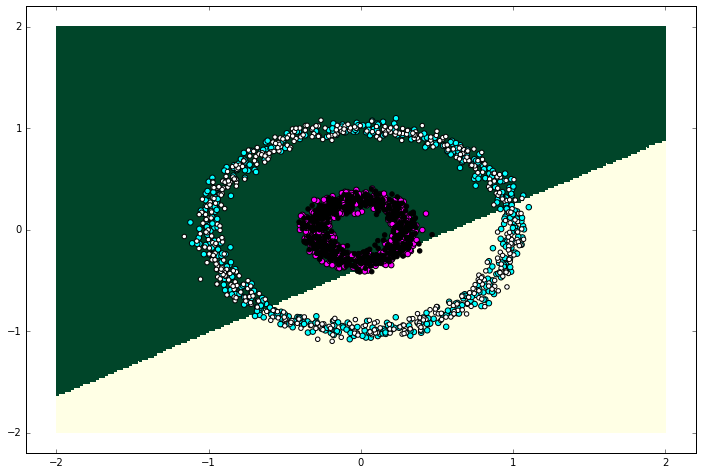

In [43]:
plot_classifier(model_sgd_1_sigmoid,X_train,y_train,X_test,y_test,model_type = 'ann')

Se puede observar como las métricas se mantienen en general muy parecidas, sin presentar una mejora.

In [37]:
n_h=1
model_sgd_01_sigmoid = Sequential()

model_sgd_01_sigmoid.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='selu'))
model_sgd_01_sigmoid.add(Dense(n_h, init='uniform', activation='sigmoid'))

model_sgd_01_sigmoid.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse'])
model_sgd_01_sigmoid.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
scores = model_sgd_01_sigmoid.evaluate(X_test, y_test)
test_acc = scores[1]

/home/fefi/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


Epoch 1/50
1000/1000 [==============================] - 0s 259us/step - loss: 0.6932 - acc: 0.4960 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5320 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 3/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.5110 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 5/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.6930 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 6/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.6930 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 7/50
1000/1000 [==============================] - 0

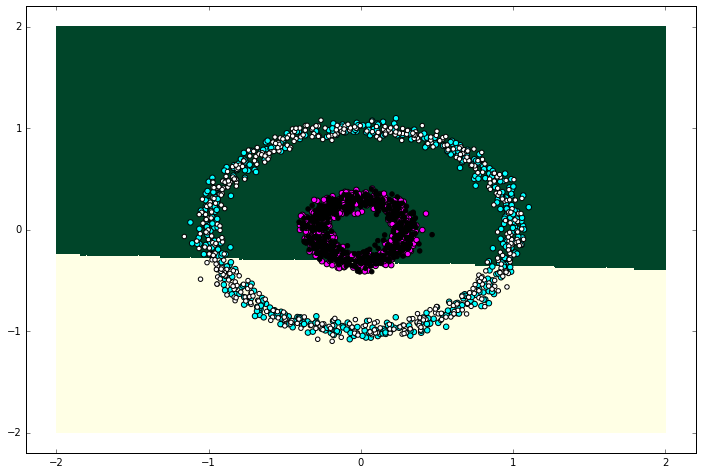

In [38]:
plot_classifier(model_sgd_01_sigmoid,X_train,y_train,X_test,y_test,model_type = 'ann')

Con una función de activación selu en la capa de entrada se ve que mediante las metricas que no mejora mucho.

# *No analice los gráficos porque no los entendí xd*

### c) Red neuronal artificial con una capa escondida

c) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el m´etodo de entrenamiento que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-par´ametros que se entregan como referencia en el c´odigo de ejemplo. Cambie el n´umero de neuronas Nh en la red entre 2 y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como funci´on de Nh. Describa y explique lo que observa. Utilice la funci´on plot classifier, dise˜nada anteriormente, para construir gr´aficos de la soluci´on en algunos casos representativos.

In [41]:
X_train.shape

(1000, 2)

2
Epoch 1/50
1000/1000 [==============================] - 0s 409us/step - loss: 0.6932 - acc: 0.5120 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 2/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 3/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 5/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2500
Epoch 6/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2500
Epoch 7/50
1000/1000 [==============================] -

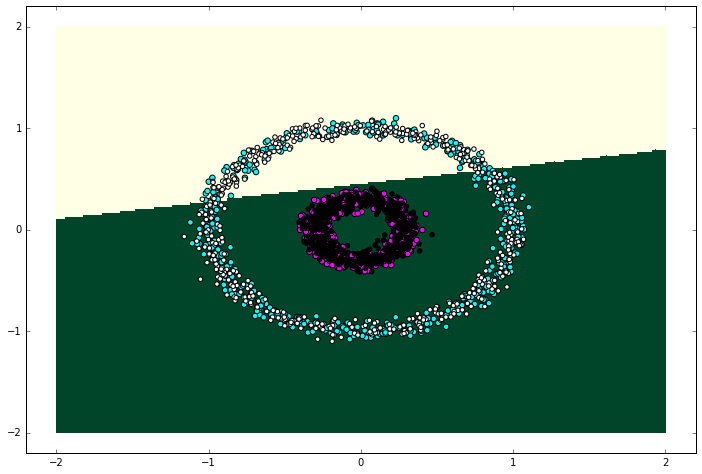

4
Epoch 1/50
1000/1000 [==============================] - 0s 462us/step - loss: 0.6932 - acc: 0.4820 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 2/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6932 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 3/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6930 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 6/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.6930 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 7/50
1000/1000 [==============================] -

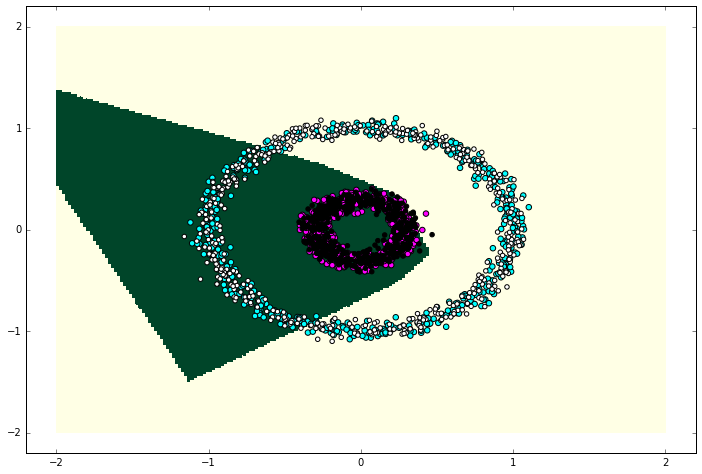

8
Epoch 1/50
1000/1000 [==============================] - 0s 465us/step - loss: 0.6932 - acc: 0.5290 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6930 - acc: 0.5350 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 3/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.6930 - acc: 0.5040 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 4/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.6929 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 5/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6927 - acc: 0.5070 - mean_absolute_error: 0.4998 - mean_squared_error: 0.2498
Epoch 6/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6927 - acc: 0.5070 - mean_absolute_error: 0.4997 - mean_squared_error: 0.2498
Epoch 7/50
1000/1000 [==============================] -

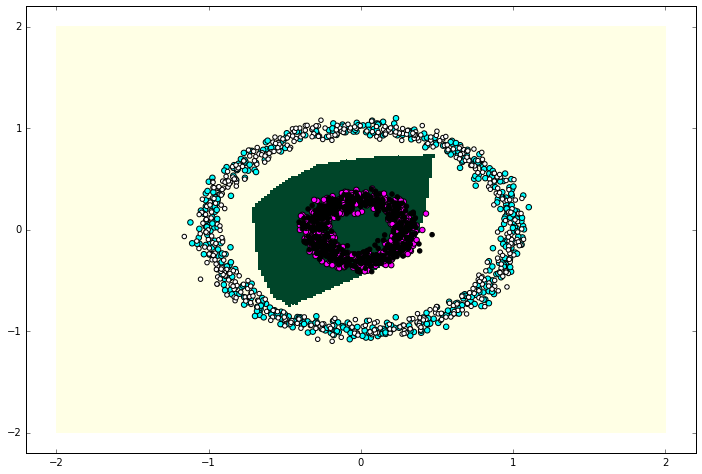

16
Epoch 1/50
1000/1000 [==============================] - 1s 671us/step - loss: 0.6934 - acc: 0.4660 - mean_absolute_error: 0.5001 - mean_squared_error: 0.2501
Epoch 2/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.6932 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 3/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.6930 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 5/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.6929 - acc: 0.5070 - mean_absolute_error: 0.4999 - mean_squared_error: 0.2499
Epoch 6/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6928 - acc: 0.5070 - mean_absolute_error: 0.4998 - mean_squared_error: 0.2498
Epoch 7/50
1000/1000 [==============================] 

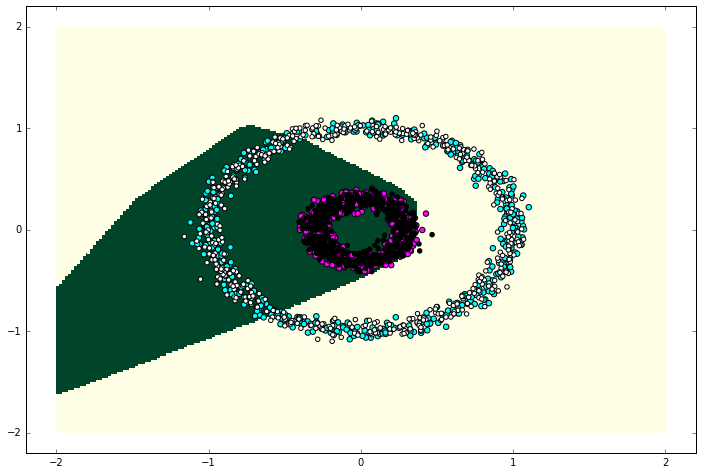

32
Epoch 1/50
1000/1000 [==============================] - 1s 670us/step - loss: 0.6935 - acc: 0.4740 - mean_absolute_error: 0.5002 - mean_squared_error: 0.2502
Epoch 2/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6933 - acc: 0.5070 - mean_absolute_error: 0.5001 - mean_squared_error: 0.2501
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070 - mean_absolute_error: 0.5000 - mean_squared_error: 0.2500
Epoch 4/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6928 - acc: 0.5070 - mean_absolute_error: 0.4998 - mean_squared_error: 0.2498
Epoch 5/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.6927 - acc: 0.5070 - mean_absolute_error: 0.4998 - mean_squared_error: 0.2498
Epoch 6/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6924 - acc: 0.5070 - mean_absolute_error: 0.4996 - mean_squared_error: 0.2496
Epoch 7/50
1000/1000 [==============================] 

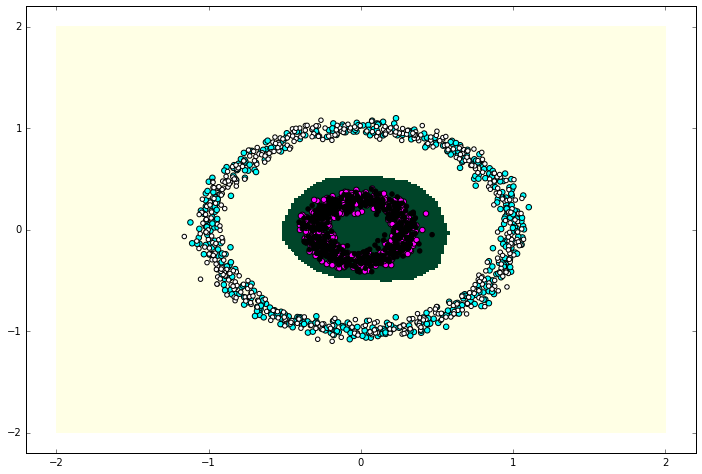

In [55]:
test_acc = [] 
train_acc = []
for i in range(1,6):
    n_h=2**i
    print n_h
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse']) 

    model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
    scores = model.evaluate(X_test, y_test)
    test_acc.append(scores[1])
    scores = model.evaluate(X_train, y_train)
    train_acc.append(scores[1])
    plot_classifier(model,X_train,y_train,X_test,y_test,model_type = 'ann')



Mediante la gráfica se puede ver que el último resultado obtenido, con 32 neuronas tiene un muy buen comportamiento separando correctamente el círculo interno del externo.

In [56]:
print test_acc
print train_acc

[0.68899999999999995, 0.80800000000000005, 0.98499999999999999, 0.80800000000000005, 1.0]
[0.66500000000000004, 0.82499999999999996, 0.97699999999999998, 0.82999999999999996, 1.0]


/usr/lib/python2.7/dist-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


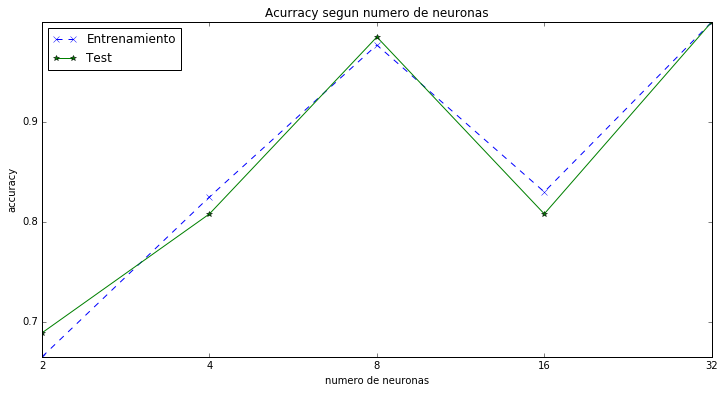

In [61]:
import matplotlib.pyplot as plt
N_h = [2,4,8,16,32]

plt.figure(figsize=(12,6))  
plt.title("Acurracy segun numero de neuronas")
plt.xlabel("numero de neuronas")
plt.ylabel("accuracy")
indice = np.arange(5)   # Declara un array
plt.xticks(indice, N_h)   
plt.yticks(np.arange(0.0,1.0,0.1))
plt.plot(train_acc, marker='x', linestyle='--', color='b', label = "Entrenamiento")
plt.plot(test_acc, marker='*', linestyle='-', color='g', label = "Test")
plt.legend(loc="bottom left")
plt.show()

Mediante el accuracy obtenido del test se puede ver que el comportamiento con la red de 32 neuronas funciona bien con un accuracy de un 100\%. 
Además el error de entrenamiento y prueba se comportan de una forma muy similar.

### d) Árbol de clasificación de un nivel

d) Demuestre experimentalmente que stump (´arbol de clasificaci´on de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la funci´on de partici´on que prefiera. Sea convincente: por ejemplo, intente modificar los par´ametros de la m´aquina, reportando m´etricas que permitan evaluar el desempe˜no del modelo en el problema con cada cambio efectuado. Adapte tambi´en la funci´on plot classifier para que represente gr´aficamente la soluci´on encontrada por el ´arbol. Describa y explique lo que observa, reportando gr´aficos de la soluci´on s´olo para algunos casos representativos.

Se procede a resolver el problema mediante un árbol de clasificación con un solo nivel. 

Para la ejecución del árbol se pueden modificar los siguientes parámetros:
* criterion: Mide la calidad de un split.
    * gini 
    * entropy
* splitter: Estrategia para elegir el splir en cada nodo.
    * best
    * random
* max_depth: La profundidad máxima del árbol.

Test Accuracy = 0.670000
1


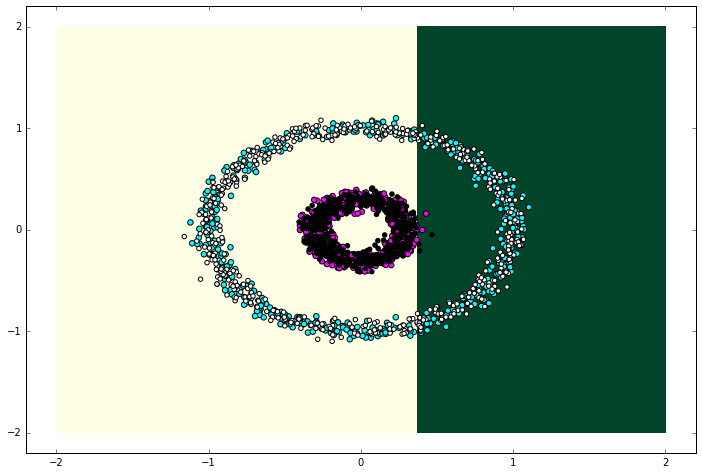

In [63]:
from sklearn.tree import DecisionTreeClassifier as Tree  #http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf_gini_best=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf_gini_best.fit(X_train,y_train)
acc_test = clf_gini_best.score(X_test,y_test)
print "Test Accuracy = %f"%acc_test
print clf_gini_best.tree_.max_depth
plot_classifier(clf_gini_best,X_train,y_train,X_test,y_test,'tree')

Test Accuracy = 0.658000
1


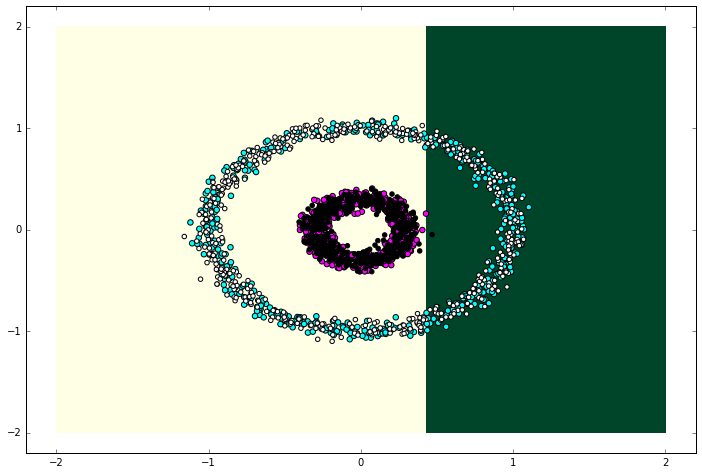

In [64]:
clf_entropy_best=Tree(criterion='entropy',splitter='best',random_state=0,max_depth=1)
clf_entropy_best.fit(X_train,y_train)
acc_test = clf_entropy_best.score(X_test,y_test)
print "Test Accuracy = %f"%acc_test
print clf_entropy_best.tree_.max_depth
plot_classifier(clf_entropy_best,X_train,y_train,X_test,y_test,'tree')

Test Accuracy = 0.679000
1


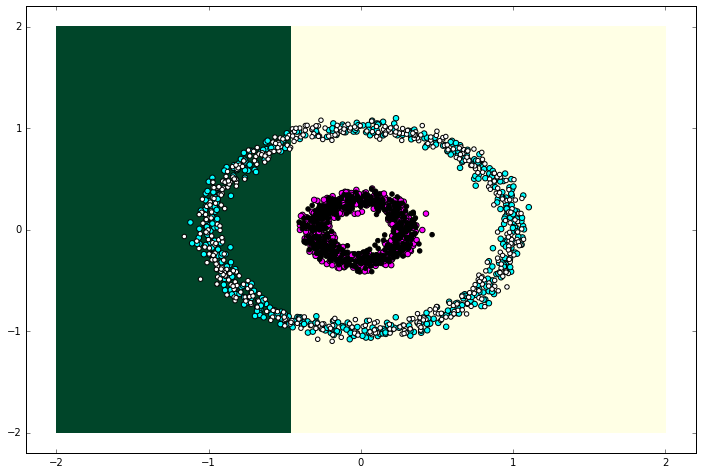

In [65]:
clf_gini_random=Tree(criterion='gini',splitter='random',random_state=0,max_depth=1)
clf_gini_random.fit(X_train,y_train)
acc_test = clf_gini_random.score(X_test,y_test)
print "Test Accuracy = %f"%acc_test
print clf_gini_random.tree_.max_depth
plot_classifier(clf_gini_random,X_train,y_train,X_test,y_test,'tree')

Test Accuracy = 0.679000
1


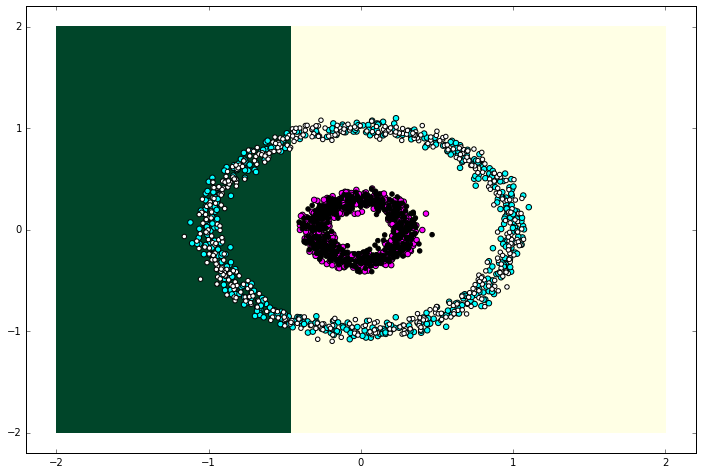

In [66]:
clf_entropy=Tree(criterion='entropy',splitter='random',random_state=0,max_depth=1)
clf_entropy.fit(X_train,y_train)
acc_test = clf_entropy.score(X_test,y_test)
print "Test Accuracy = %f"%acc_test
print clf_entropy.tree_.max_depth
plot_classifier(clf_entropy,X_train,y_train,X_test,y_test,'tree')

Como es de esperar con un solo nivel del árbol no es posible resolver el problema que se tiene, pues el árbol de clasificación solo podrá dividir la región en dos.

Como se ve en todos los gráficos anteriores, lo mecionado anteriormente ocurre con un accuracy común de 0.6 aproximadamente.

### e) Árbol de clasificación con múltiples niveles

(e) Demuestre experimentalmente que un ´arbol de clasificaci´on de m´ultiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la funci´on de partici´on que prefiera, pero puede optar tranquilamente por usar los hiper-par´ametros que se entregan como referencia en el c´odigo de ejemplo. Cambie el n´umero de niveles admitidos en el ´arbol Nt entre 2 y 20, graficando el error de entrenamiento y pruebas como funci´on de Nt. Describa y explique lo que observa. Utilice la funci´on plot classifier, dise˜nada anteriormente, para construir gr´aficos de la soluci´on en algunos casos representativos.

Nuevamente el problema se enfrenta con árboles de clasificación, pero en esta ocasión se hará con más de uno, variando entre 2 y 20 niveles.

2
Test Accuracy = 0.867000


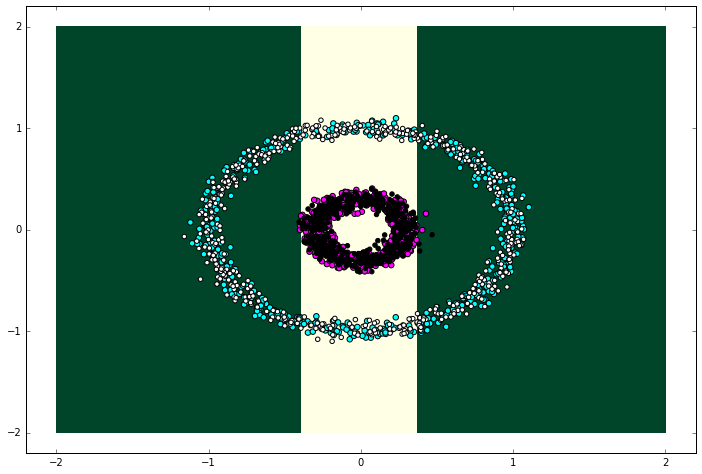

3
Test Accuracy = 0.924000


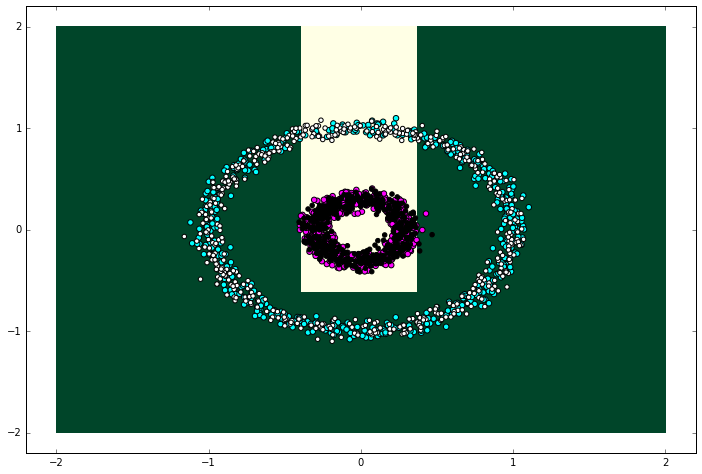

4
Test Accuracy = 0.994000


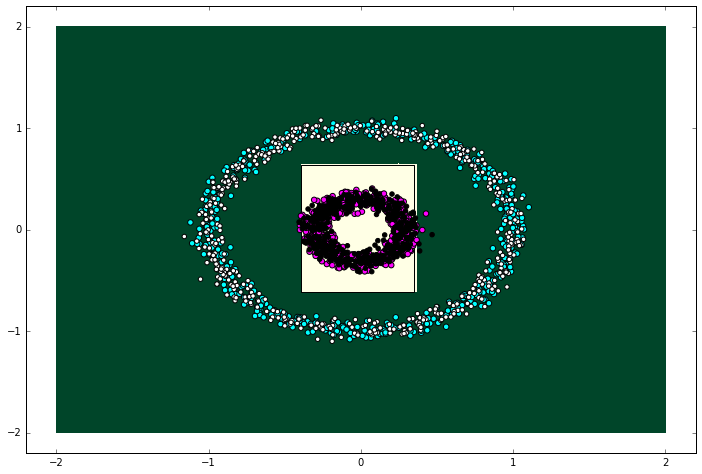

5
Test Accuracy = 0.992000


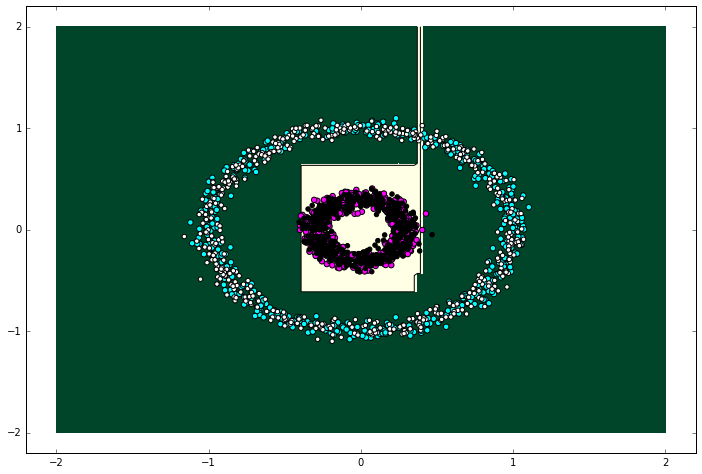

6
Test Accuracy = 0.992000


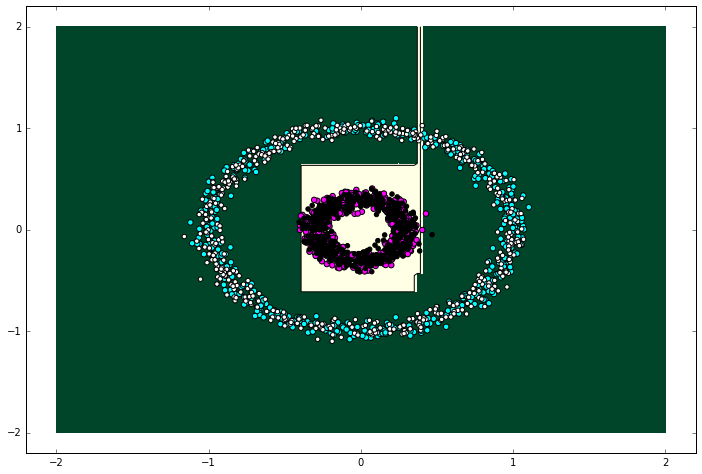

7
Test Accuracy = 0.992000


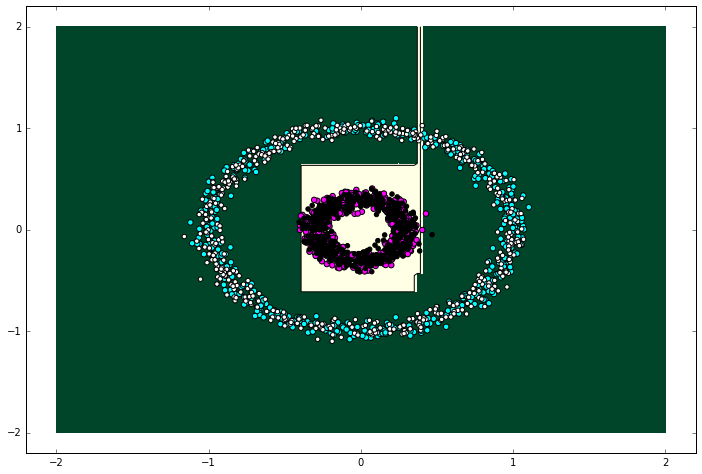

8
Test Accuracy = 0.992000


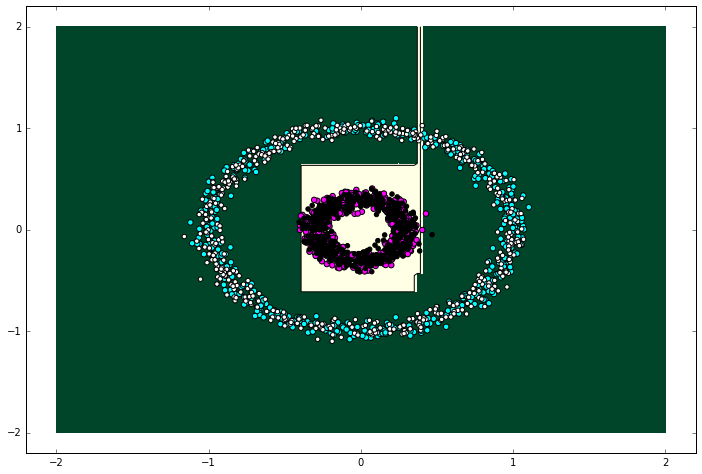

9
Test Accuracy = 0.992000


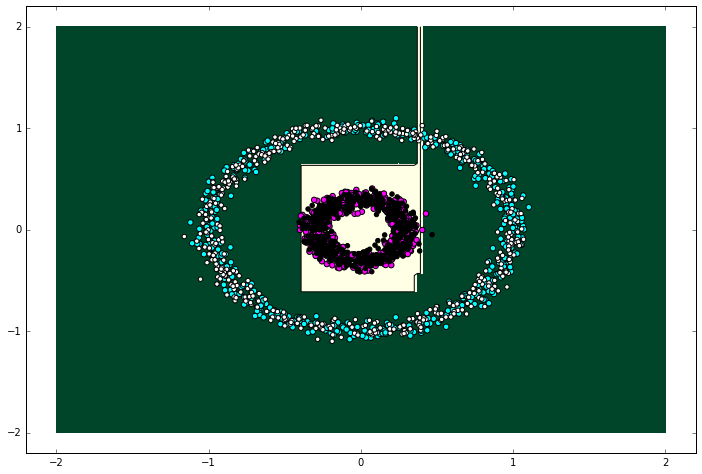

10
Test Accuracy = 0.992000


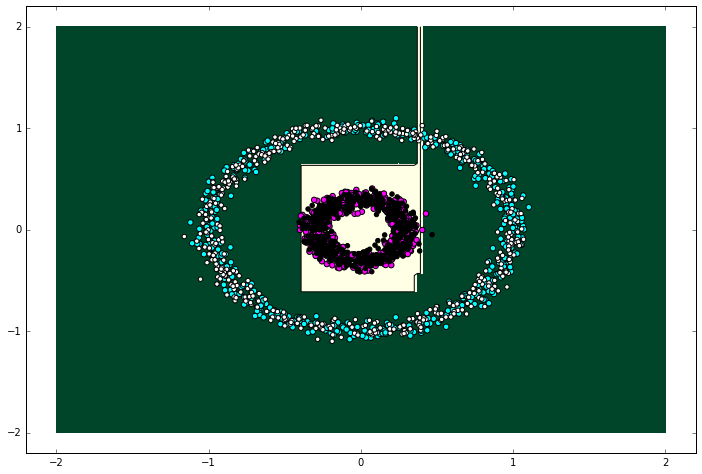

11
Test Accuracy = 0.992000


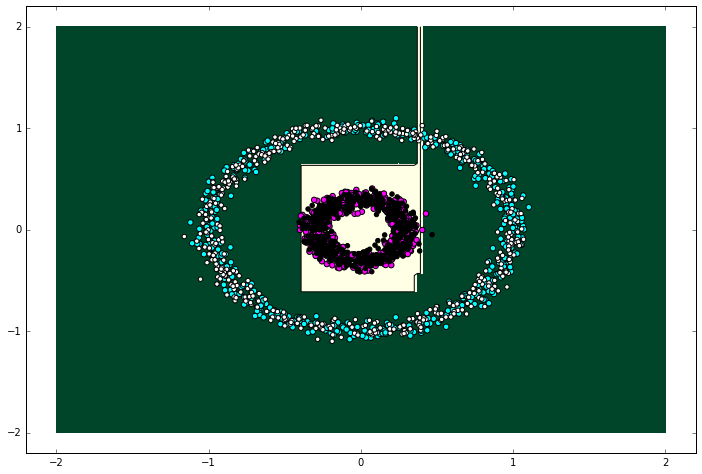

12
Test Accuracy = 0.992000


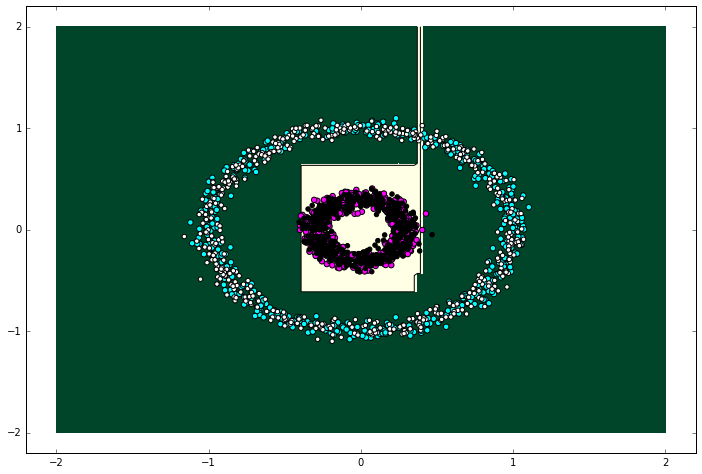

13
Test Accuracy = 0.992000


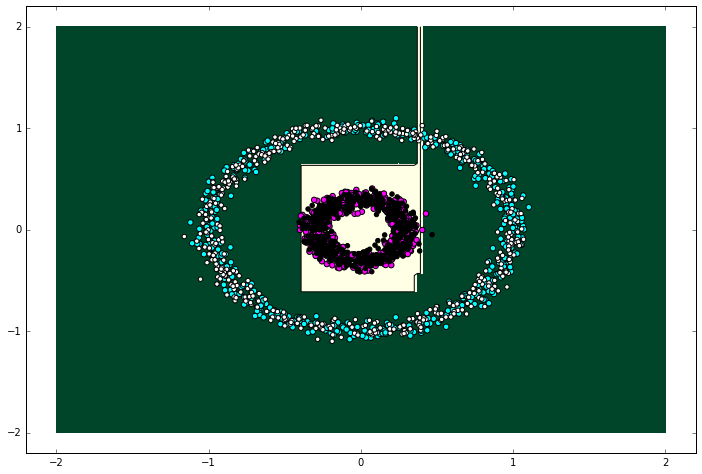

14
Test Accuracy = 0.992000


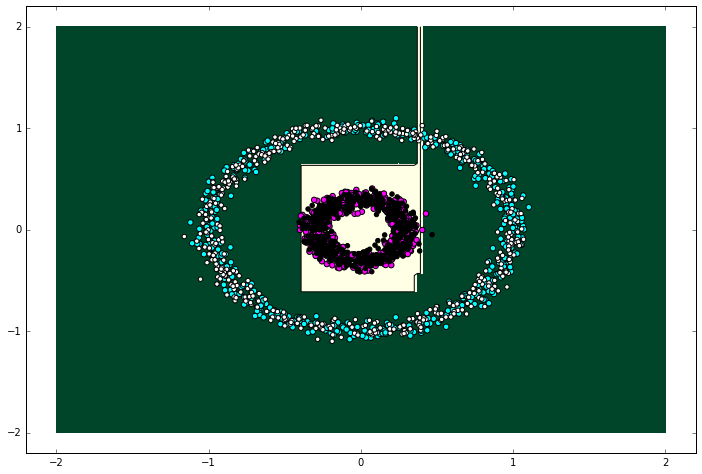

15
Test Accuracy = 0.992000


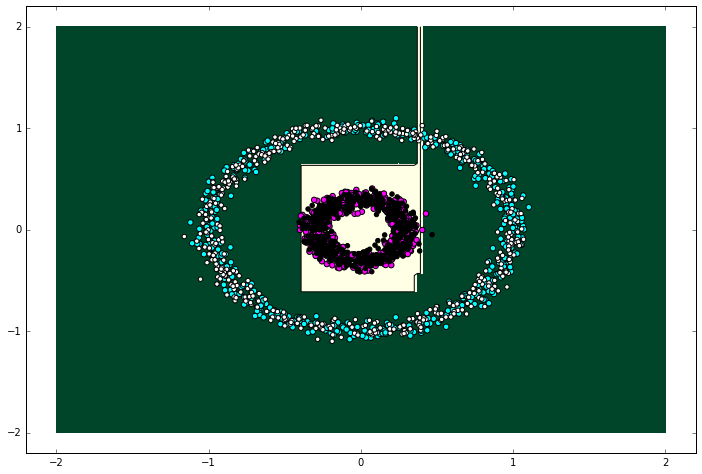

16
Test Accuracy = 0.992000


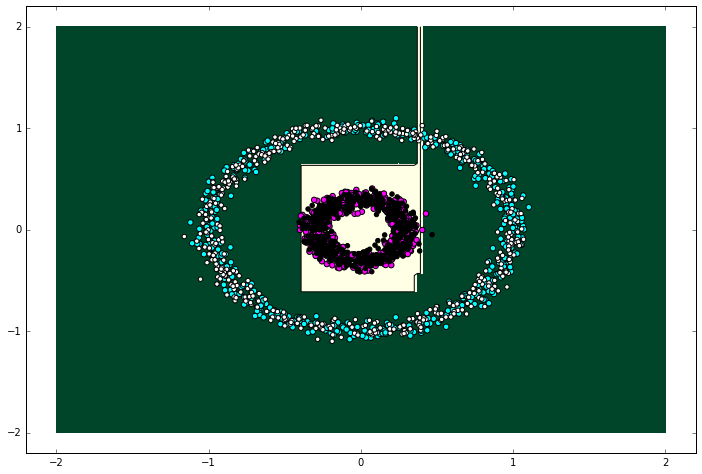

17
Test Accuracy = 0.992000


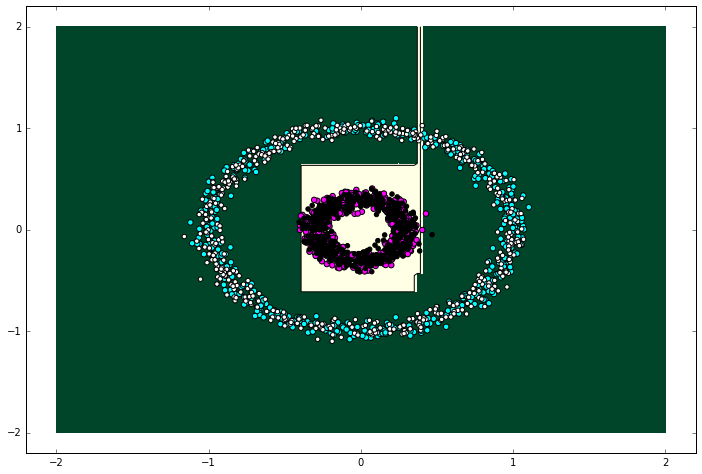

18
Test Accuracy = 0.992000


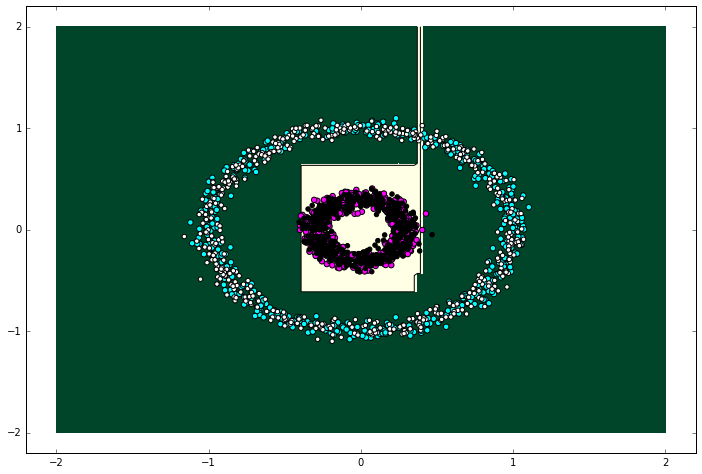

19
Test Accuracy = 0.992000


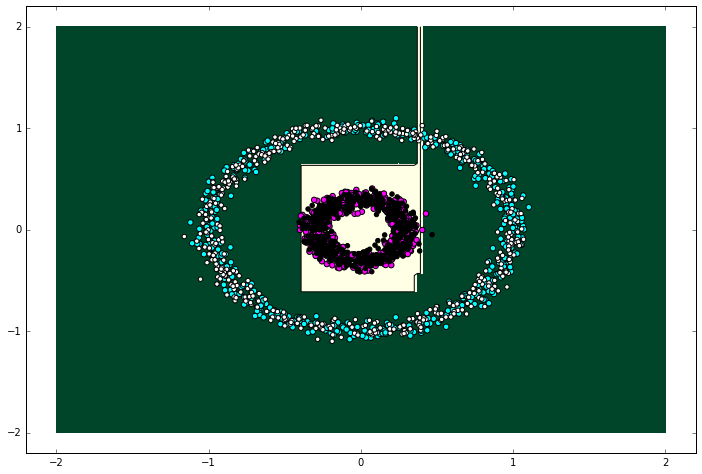

20
Test Accuracy = 0.992000


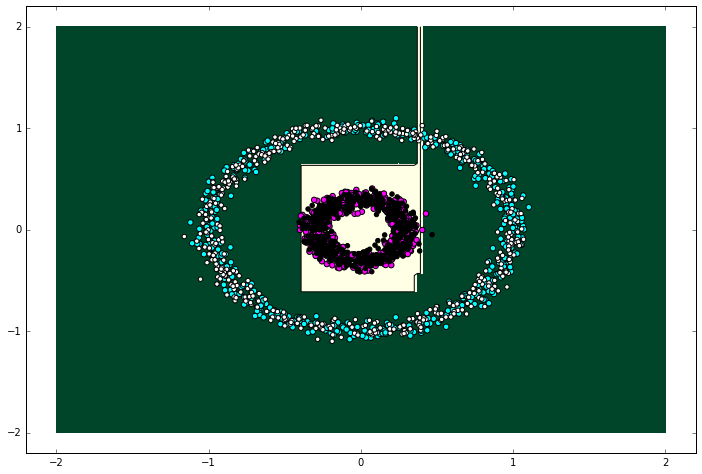

In [73]:
acc_test = []
acc_train = []
for i in range(2, 21):
    print i
    n_t = i
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,y_train)
    acc_test.append(clf.score(X_test,y_test))
    acc_train.append(clf.score(X_train,y_train))
    print "Test Accuracy = %f"%acc_test[-1]
    plot_classifier(clf,X_train,y_train,X_test,y_test,'tree')

Es posible ver mediante las gráficas que el árbol de clasificación con más de un nivel permite dividir el espacio en más regiones, llegando al punto en que pueda separar correctamente el círculo interior del exterior. De hecho, ya con un árbol de nivel 4 logra cumplir con la tarea.

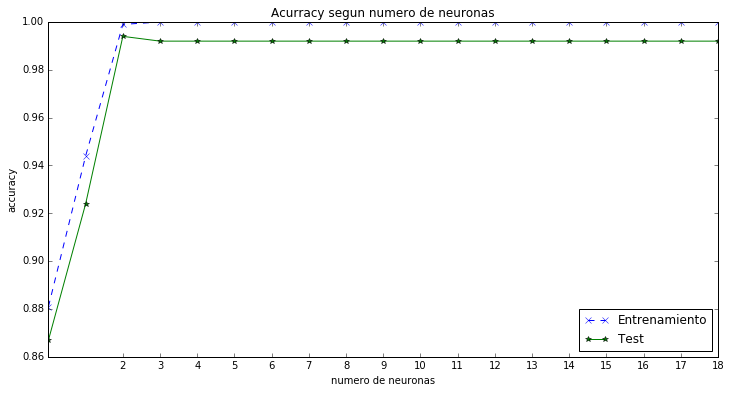

In [81]:
levels = range(2,21)

plt.figure(figsize=(12,6))  
plt.title("Acurracy segun numero de neuronas")
plt.xlabel("numero de neuronas")
plt.ylabel("accuracy")
plt.xticks(levels)   
plt.plot(acc_train, marker='x', linestyle='--', color='b', label = "Entrenamiento")
plt.plot(acc_test, marker='*', linestyle='-', color='g', label = "Test")
plt.legend(loc="bottom left")
plt.show()

Mediante el acurracy es posible verificar lo mencionado anteriormente, con nivel meyor o igual a 4 se logra un buen acurracy, lo cual hace que separe bien los dos conjuntos de datos.

### f) PCA con kernel gaussiano

(f) Como ya se demostr´o experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello deber´a realizar una proyecci´on de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la t´ecnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer sus vectores con dimensi´on infinita de mayor varianza.

Dado que ya hmos comrobado que el proble no es linealmente separable, se realiza una una proyección de los datos a un nuevo espacio dimensional,en el cual se reconozcan los patrones no lineales, para luego poder trabajarlos con fronteras lineales. Para lograr lo anterior, se utiliza la técnica de PCA con la ayuda de un Kernel Gaussiano para extraer sus vectores con dimensión infinita de mayor varianza.

In [82]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

In [96]:
#Graficar!!
def visualize(x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    plt.title(title)
    plt.show()

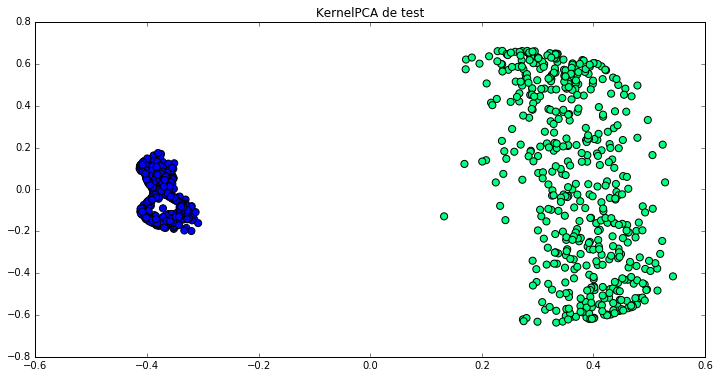

In [98]:
visualize(Xkpca_test, y_test, "KernelPCA de test")

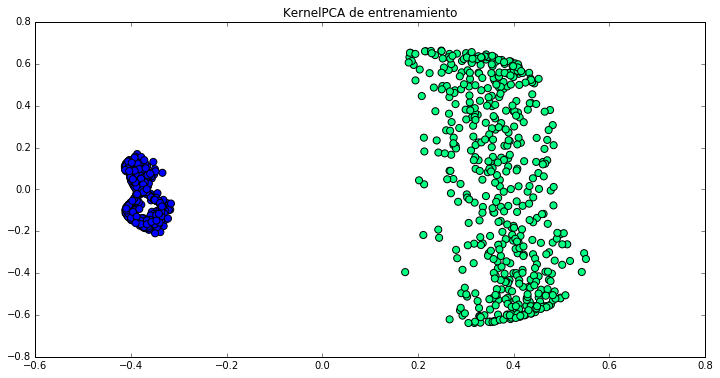

In [99]:
visualize(Xkpca_train, y_train, "KernelPCA de entrenamiento")

Luego, de aplicar Kernel PCA es pobile ver que en este nuevo espacio, los datos proyectados son separables linealmente.

### g) Algoritmo de aprendizaje con fronteras lineal para los datos proyectados

(g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto con estos m´etodos. Reporte m´etricas para evaluar el desempe˜no, comente y concluya.

Dado que ya contamos con la proyección de lo datos en un nuevo espacio, en donde los datos son linelamente separados, se ajusta un modelo que trabaja con fronteras lineales para poder resolver este problema.

In [100]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

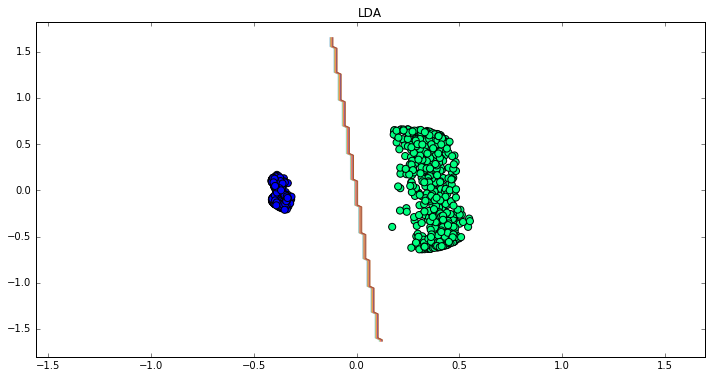

Miss Classification Loss: 0.000000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       507
          1       1.00      1.00      1.00       493

avg / total       1.00      1.00      1.00      1000



In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report
model = LDA()
model.fit(Xkpca_train,y_train)
visualize_border(model,Xkpca_train,y_train,"LDA")

y_true = y_test
y_pred = model.predict(Xkpca_test)
model.predict(Xkpca_test)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred)))
print classification_report(y_true,model.predict(Xkpca_test))

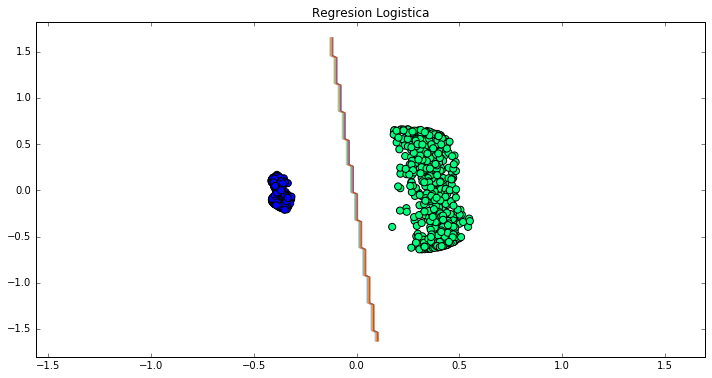

Accuracy train Regresion Logistica : 1.0
Accuracy test Regresion Logistica: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       507
          1       1.00      1.00      1.00       493

avg / total       1.00      1.00      1.00      1000



In [110]:
from sklearn.linear_model import LogisticRegression as LR
clf_lr = LR()
clf_lr.set_params(penalty='l2')
clf_lr.fit(Xkpca_train,y_train)
predicted = clf_lr.predict(Xkpca_test)
predicted_train = clf_lr.predict(Xkpca_train)


visualize_border(clf_lr,Xkpca_train,y_train,"Regresion Logistica")

print "Accuracy train Regresion Logistica :",(accuracy_score(y_train,predicted_train))   
print "Accuracy test Regresion Logistica:",(accuracy_score(y_test,predicted))
print classification_report(y_true,clf_lr.predict(Xkpca_test))